In [1]:
!pip install opencv-python
import numpy as np
import pandas as pd
import os
import csv
import cv2
import matplotlib.pyplot as plt
import pickle
import joblib
from sklearn.svm import SVC
from skimage.feature import hog
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix , accuracy_score, precision_score, recall_score, f1_score, roc_curve ,roc_auc_score,ConfusionMatrixDisplay
     

Path Definition: Paths for four folders are defined, each containing images of different categories of brain scans: glioma tumor, meningioma tumor, no tumor, and pituitary tumor.

In [2]:
#Path of dataset
folder1="glioma_tumor"
folder2="meningioma_tumor"
folder3="no_tumor"
folder4="pituitary_tumor"


#### Feature Extraction Using HOG


Feature Extraction Using HOG (Histogram of Oriented Gradients): The core of this script lies in extracting features from the images using the Histogram of Oriented Gradients (HOG) method. This process is repeated for each folder (each tumor type). The steps for feature extraction include:

Reading each image from the dataset.
Resizing images to a standard size (200x200 pixels) to ensure uniformity.
Converting images to grayscale, which is a common preprocessing step in image processing to reduce complexity while retaining essential features.
Applying a median filter with a 3x3 kernel to reduce noise in the images, which helps in highlighting important features while suppressing irrelevant details.
Extracting HOG features from the preprocessed images. HOG is a feature descriptor that is particularly effective for object detection in computer vision. It works by counting occurrences of gradient orientation in localized portions of an image.
Data Structuring and Storage: After extracting the HOG descriptors, they are stored in a pandas DataFrame, with each row representing the HOG feature vector of an image. A 'Class' column is added to this DataFrame to label the data according to the type of tumor (or absence thereof) it represents. This labeling is crucial for supervised learning tasks.

Saving the Data: The feature vectors along with their labels are saved into .npy files for each category of brain scans. This file format is efficient for storing and accessing large arrays, making it suitable for machine learning tasks.

In [3]:
hog_descs = []
i = 0
for filename in os.listdir(folder1):
    # print(os.path.join(folder_path, filename))
    img = cv2.imread(os.path.join(folder1, filename))
    if img is not None:
        
        #resize total  image size to 200 x 200
        resize=(200,200)
        img1=cv2.resize(img,resize)
        
        # Grayscaling the image dataset
        gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        
        # Apply median filter with kernel size 3x3
        median_img = cv2.medianBlur(gray, 3)
    
        fd, hog_image = hog(median_img, orientations=6, pixels_per_cell=(4, 4),  transform_sqrt=True,cells_per_block=(1, 1), visualize=True)
        # Convert the descriptor array into a DataFrame format
        hog_descs.append(fd)
        df = pd.DataFrame(fd)
        # print(df)
        print("descriptor shape ", i, " : ", df.shape)
        i = i + 1

df = pd.DataFrame(hog_descs)
i = 0
#add row of class
df["Class"] = i

#Storing previously saved feature descriptor to numpy file .
np.save("glioma.npy", df.to_numpy())

descriptor shape  0  :  (15000, 1)
descriptor shape  1  :  (15000, 1)
descriptor shape  2  :  (15000, 1)
descriptor shape  3  :  (15000, 1)
descriptor shape  4  :  (15000, 1)
descriptor shape  5  :  (15000, 1)
descriptor shape  6  :  (15000, 1)
descriptor shape  7  :  (15000, 1)
descriptor shape  8  :  (15000, 1)
descriptor shape  9  :  (15000, 1)
descriptor shape  10  :  (15000, 1)
descriptor shape  11  :  (15000, 1)
descriptor shape  12  :  (15000, 1)
descriptor shape  13  :  (15000, 1)
descriptor shape  14  :  (15000, 1)
descriptor shape  15  :  (15000, 1)
descriptor shape  16  :  (15000, 1)
descriptor shape  17  :  (15000, 1)
descriptor shape  18  :  (15000, 1)
descriptor shape  19  :  (15000, 1)
descriptor shape  20  :  (15000, 1)
descriptor shape  21  :  (15000, 1)
descriptor shape  22  :  (15000, 1)
descriptor shape  23  :  (15000, 1)
descriptor shape  24  :  (15000, 1)
descriptor shape  25  :  (15000, 1)
descriptor shape  26  :  (15000, 1)
descriptor shape  27  :  (15000, 1)
de

descriptor shape  225  :  (15000, 1)
descriptor shape  226  :  (15000, 1)
descriptor shape  227  :  (15000, 1)
descriptor shape  228  :  (15000, 1)
descriptor shape  229  :  (15000, 1)
descriptor shape  230  :  (15000, 1)
descriptor shape  231  :  (15000, 1)
descriptor shape  232  :  (15000, 1)
descriptor shape  233  :  (15000, 1)
descriptor shape  234  :  (15000, 1)
descriptor shape  235  :  (15000, 1)
descriptor shape  236  :  (15000, 1)
descriptor shape  237  :  (15000, 1)
descriptor shape  238  :  (15000, 1)
descriptor shape  239  :  (15000, 1)
descriptor shape  240  :  (15000, 1)
descriptor shape  241  :  (15000, 1)
descriptor shape  242  :  (15000, 1)
descriptor shape  243  :  (15000, 1)
descriptor shape  244  :  (15000, 1)
descriptor shape  245  :  (15000, 1)
descriptor shape  246  :  (15000, 1)
descriptor shape  247  :  (15000, 1)
descriptor shape  248  :  (15000, 1)
descriptor shape  249  :  (15000, 1)
descriptor shape  250  :  (15000, 1)
descriptor shape  251  :  (15000, 1)
d

descriptor shape  447  :  (15000, 1)
descriptor shape  448  :  (15000, 1)
descriptor shape  449  :  (15000, 1)
descriptor shape  450  :  (15000, 1)
descriptor shape  451  :  (15000, 1)
descriptor shape  452  :  (15000, 1)
descriptor shape  453  :  (15000, 1)
descriptor shape  454  :  (15000, 1)
descriptor shape  455  :  (15000, 1)
descriptor shape  456  :  (15000, 1)
descriptor shape  457  :  (15000, 1)
descriptor shape  458  :  (15000, 1)
descriptor shape  459  :  (15000, 1)
descriptor shape  460  :  (15000, 1)
descriptor shape  461  :  (15000, 1)
descriptor shape  462  :  (15000, 1)
descriptor shape  463  :  (15000, 1)
descriptor shape  464  :  (15000, 1)
descriptor shape  465  :  (15000, 1)
descriptor shape  466  :  (15000, 1)
descriptor shape  467  :  (15000, 1)
descriptor shape  468  :  (15000, 1)
descriptor shape  469  :  (15000, 1)
descriptor shape  470  :  (15000, 1)
descriptor shape  471  :  (15000, 1)
descriptor shape  472  :  (15000, 1)
descriptor shape  473  :  (15000, 1)
d

descriptor shape  669  :  (15000, 1)
descriptor shape  670  :  (15000, 1)
descriptor shape  671  :  (15000, 1)
descriptor shape  672  :  (15000, 1)
descriptor shape  673  :  (15000, 1)
descriptor shape  674  :  (15000, 1)
descriptor shape  675  :  (15000, 1)
descriptor shape  676  :  (15000, 1)
descriptor shape  677  :  (15000, 1)
descriptor shape  678  :  (15000, 1)
descriptor shape  679  :  (15000, 1)
descriptor shape  680  :  (15000, 1)
descriptor shape  681  :  (15000, 1)
descriptor shape  682  :  (15000, 1)
descriptor shape  683  :  (15000, 1)
descriptor shape  684  :  (15000, 1)
descriptor shape  685  :  (15000, 1)
descriptor shape  686  :  (15000, 1)
descriptor shape  687  :  (15000, 1)
descriptor shape  688  :  (15000, 1)
descriptor shape  689  :  (15000, 1)
descriptor shape  690  :  (15000, 1)
descriptor shape  691  :  (15000, 1)
descriptor shape  692  :  (15000, 1)
descriptor shape  693  :  (15000, 1)
descriptor shape  694  :  (15000, 1)
descriptor shape  695  :  (15000, 1)
d

In [4]:
#Folder 2 (Meningioma Tumor)
hog_descs = []
i = 0
for filename in os.listdir(folder2):
    # print(os.path.join(folder_path, filename))
    img = cv2.imread(os.path.join(folder2, filename))
    if img is not None:
        #resize total  image size to 200 x 200
        resize=(200,200)
        img1=cv2.resize(img,resize)
        
        # Grayscaling the image dataset
        gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        
        # Apply median filter with kernel size 3x3
        median_img = cv2.medianBlur(gray, 3)

        fd, hog_image = hog(median_img, orientations=6, pixels_per_cell=(4, 4),  transform_sqrt=True,cells_per_block=(1, 1), visualize=True)
        # Convert the descriptor array into a DataFrame format
        hog_descs.append(fd)
        df = pd.DataFrame(fd)
        # print(df)
        print("descriptor shape ", i, " : ", df.shape)
        i = i + 1

df = pd.DataFrame(hog_descs)
i = 1
#add row class
df["Class"] = i

#Storing previously saved feature descriptor to numpy file .
np.save("meningioma.npy", df.to_numpy())

descriptor shape  0  :  (15000, 1)
descriptor shape  1  :  (15000, 1)
descriptor shape  2  :  (15000, 1)
descriptor shape  3  :  (15000, 1)
descriptor shape  4  :  (15000, 1)
descriptor shape  5  :  (15000, 1)
descriptor shape  6  :  (15000, 1)
descriptor shape  7  :  (15000, 1)
descriptor shape  8  :  (15000, 1)
descriptor shape  9  :  (15000, 1)
descriptor shape  10  :  (15000, 1)
descriptor shape  11  :  (15000, 1)
descriptor shape  12  :  (15000, 1)
descriptor shape  13  :  (15000, 1)
descriptor shape  14  :  (15000, 1)
descriptor shape  15  :  (15000, 1)
descriptor shape  16  :  (15000, 1)
descriptor shape  17  :  (15000, 1)
descriptor shape  18  :  (15000, 1)
descriptor shape  19  :  (15000, 1)
descriptor shape  20  :  (15000, 1)
descriptor shape  21  :  (15000, 1)
descriptor shape  22  :  (15000, 1)
descriptor shape  23  :  (15000, 1)
descriptor shape  24  :  (15000, 1)
descriptor shape  25  :  (15000, 1)
descriptor shape  26  :  (15000, 1)
descriptor shape  27  :  (15000, 1)
de

descriptor shape  225  :  (15000, 1)
descriptor shape  226  :  (15000, 1)
descriptor shape  227  :  (15000, 1)
descriptor shape  228  :  (15000, 1)
descriptor shape  229  :  (15000, 1)
descriptor shape  230  :  (15000, 1)
descriptor shape  231  :  (15000, 1)
descriptor shape  232  :  (15000, 1)
descriptor shape  233  :  (15000, 1)
descriptor shape  234  :  (15000, 1)
descriptor shape  235  :  (15000, 1)
descriptor shape  236  :  (15000, 1)
descriptor shape  237  :  (15000, 1)
descriptor shape  238  :  (15000, 1)
descriptor shape  239  :  (15000, 1)
descriptor shape  240  :  (15000, 1)
descriptor shape  241  :  (15000, 1)
descriptor shape  242  :  (15000, 1)
descriptor shape  243  :  (15000, 1)
descriptor shape  244  :  (15000, 1)
descriptor shape  245  :  (15000, 1)
descriptor shape  246  :  (15000, 1)
descriptor shape  247  :  (15000, 1)
descriptor shape  248  :  (15000, 1)
descriptor shape  249  :  (15000, 1)
descriptor shape  250  :  (15000, 1)
descriptor shape  251  :  (15000, 1)
d

descriptor shape  447  :  (15000, 1)
descriptor shape  448  :  (15000, 1)
descriptor shape  449  :  (15000, 1)
descriptor shape  450  :  (15000, 1)
descriptor shape  451  :  (15000, 1)
descriptor shape  452  :  (15000, 1)
descriptor shape  453  :  (15000, 1)
descriptor shape  454  :  (15000, 1)
descriptor shape  455  :  (15000, 1)
descriptor shape  456  :  (15000, 1)
descriptor shape  457  :  (15000, 1)
descriptor shape  458  :  (15000, 1)
descriptor shape  459  :  (15000, 1)
descriptor shape  460  :  (15000, 1)
descriptor shape  461  :  (15000, 1)
descriptor shape  462  :  (15000, 1)
descriptor shape  463  :  (15000, 1)
descriptor shape  464  :  (15000, 1)
descriptor shape  465  :  (15000, 1)
descriptor shape  466  :  (15000, 1)
descriptor shape  467  :  (15000, 1)
descriptor shape  468  :  (15000, 1)
descriptor shape  469  :  (15000, 1)
descriptor shape  470  :  (15000, 1)
descriptor shape  471  :  (15000, 1)
descriptor shape  472  :  (15000, 1)
descriptor shape  473  :  (15000, 1)
d

descriptor shape  669  :  (15000, 1)
descriptor shape  670  :  (15000, 1)
descriptor shape  671  :  (15000, 1)
descriptor shape  672  :  (15000, 1)
descriptor shape  673  :  (15000, 1)
descriptor shape  674  :  (15000, 1)
descriptor shape  675  :  (15000, 1)
descriptor shape  676  :  (15000, 1)
descriptor shape  677  :  (15000, 1)
descriptor shape  678  :  (15000, 1)
descriptor shape  679  :  (15000, 1)
descriptor shape  680  :  (15000, 1)
descriptor shape  681  :  (15000, 1)
descriptor shape  682  :  (15000, 1)
descriptor shape  683  :  (15000, 1)
descriptor shape  684  :  (15000, 1)
descriptor shape  685  :  (15000, 1)
descriptor shape  686  :  (15000, 1)
descriptor shape  687  :  (15000, 1)
descriptor shape  688  :  (15000, 1)
descriptor shape  689  :  (15000, 1)
descriptor shape  690  :  (15000, 1)
descriptor shape  691  :  (15000, 1)
descriptor shape  692  :  (15000, 1)
descriptor shape  693  :  (15000, 1)
descriptor shape  694  :  (15000, 1)
descriptor shape  695  :  (15000, 1)
d

In [5]:
#Folder 3 (No tumor)
hog_descs = []
i = 0
for filename in os.listdir(folder3):
    # print(os.path.join(folder_path, filename))
    img = cv2.imread(os.path.join(folder3, filename))
    if img is not None:
        #resize total  image size to 200 x 200
        resize=(200,200)
        img1=cv2.resize(img,resize)

        # Grayscaling the image dataset
        gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        
        # Apply median filter with kernel size 3x3
        median_img = cv2.medianBlur(gray, 3)

        fd, hog_image = hog(median_img, orientations=6, pixels_per_cell=(4, 4),  transform_sqrt=True,cells_per_block=(1, 1), visualize=True)
        # Convert the descriptor array into a DataFrame format
        hog_descs.append(fd)
        df = pd.DataFrame(fd)
        # print(df)
        print("descriptor shape ", i, " : ", df.shape)
        i = i + 1

df = pd.DataFrame(hog_descs)
i = 2
#add row class
df["Class"] = i

#Storing previously saved feature descriptor to numpy file .
np.save("notumor.npy", df.to_numpy())

descriptor shape  0  :  (15000, 1)
descriptor shape  1  :  (15000, 1)
descriptor shape  2  :  (15000, 1)
descriptor shape  3  :  (15000, 1)
descriptor shape  4  :  (15000, 1)
descriptor shape  5  :  (15000, 1)
descriptor shape  6  :  (15000, 1)
descriptor shape  7  :  (15000, 1)
descriptor shape  8  :  (15000, 1)
descriptor shape  9  :  (15000, 1)
descriptor shape  10  :  (15000, 1)
descriptor shape  11  :  (15000, 1)
descriptor shape  12  :  (15000, 1)
descriptor shape  13  :  (15000, 1)
descriptor shape  14  :  (15000, 1)
descriptor shape  15  :  (15000, 1)
descriptor shape  16  :  (15000, 1)
descriptor shape  17  :  (15000, 1)
descriptor shape  18  :  (15000, 1)
descriptor shape  19  :  (15000, 1)
descriptor shape  20  :  (15000, 1)
descriptor shape  21  :  (15000, 1)
descriptor shape  22  :  (15000, 1)
descriptor shape  23  :  (15000, 1)
descriptor shape  24  :  (15000, 1)
descriptor shape  25  :  (15000, 1)
descriptor shape  26  :  (15000, 1)
descriptor shape  27  :  (15000, 1)
de

descriptor shape  225  :  (15000, 1)
descriptor shape  226  :  (15000, 1)
descriptor shape  227  :  (15000, 1)
descriptor shape  228  :  (15000, 1)
descriptor shape  229  :  (15000, 1)
descriptor shape  230  :  (15000, 1)
descriptor shape  231  :  (15000, 1)
descriptor shape  232  :  (15000, 1)
descriptor shape  233  :  (15000, 1)
descriptor shape  234  :  (15000, 1)
descriptor shape  235  :  (15000, 1)
descriptor shape  236  :  (15000, 1)
descriptor shape  237  :  (15000, 1)
descriptor shape  238  :  (15000, 1)
descriptor shape  239  :  (15000, 1)
descriptor shape  240  :  (15000, 1)
descriptor shape  241  :  (15000, 1)
descriptor shape  242  :  (15000, 1)
descriptor shape  243  :  (15000, 1)
descriptor shape  244  :  (15000, 1)
descriptor shape  245  :  (15000, 1)
descriptor shape  246  :  (15000, 1)
descriptor shape  247  :  (15000, 1)
descriptor shape  248  :  (15000, 1)
descriptor shape  249  :  (15000, 1)
descriptor shape  250  :  (15000, 1)
descriptor shape  251  :  (15000, 1)
d

In [6]:
folder4="pituitary_tumor"
#Folder 4 (Pituitary)
hog_descs = []
i = 0
for filename in os.listdir(folder4):
    # print(os.path.join(folder_path, filename))
    img = cv2.imread(os.path.join(folder4, filename))
    if img is not None:
        #resize total  image size to 200 x 200
        resize=(200,200)
        img1=cv2.resize(img,resize)

        # Grayscaling the image dataset
        gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        
        # Apply median filter with kernel size 3x3
        median_img = cv2.medianBlur(gray, 3)

        fd, hog_image = hog(median_img, orientations=6, pixels_per_cell=(4, 4),  transform_sqrt=True,cells_per_block=(1, 1), visualize=True)
        # Convert the descriptor array into a DataFrame format
        hog_descs.append(fd)
        df = pd.DataFrame(fd)
        # print(df)
        print("descriptor shape ", i, " : ", df.shape)
        i = i + 1

df = pd.DataFrame(hog_descs)
i = 3
#add row class
df["Class"] = i

#Storing previously saved feature descriptor to numpy file .
np.save("pituitary.npy", df.to_numpy())

descriptor shape  0  :  (15000, 1)
descriptor shape  1  :  (15000, 1)
descriptor shape  2  :  (15000, 1)
descriptor shape  3  :  (15000, 1)
descriptor shape  4  :  (15000, 1)
descriptor shape  5  :  (15000, 1)
descriptor shape  6  :  (15000, 1)
descriptor shape  7  :  (15000, 1)
descriptor shape  8  :  (15000, 1)
descriptor shape  9  :  (15000, 1)
descriptor shape  10  :  (15000, 1)
descriptor shape  11  :  (15000, 1)
descriptor shape  12  :  (15000, 1)
descriptor shape  13  :  (15000, 1)
descriptor shape  14  :  (15000, 1)
descriptor shape  15  :  (15000, 1)
descriptor shape  16  :  (15000, 1)
descriptor shape  17  :  (15000, 1)
descriptor shape  18  :  (15000, 1)
descriptor shape  19  :  (15000, 1)
descriptor shape  20  :  (15000, 1)
descriptor shape  21  :  (15000, 1)
descriptor shape  22  :  (15000, 1)
descriptor shape  23  :  (15000, 1)
descriptor shape  24  :  (15000, 1)
descriptor shape  25  :  (15000, 1)
descriptor shape  26  :  (15000, 1)
descriptor shape  27  :  (15000, 1)
de

descriptor shape  225  :  (15000, 1)
descriptor shape  226  :  (15000, 1)
descriptor shape  227  :  (15000, 1)
descriptor shape  228  :  (15000, 1)
descriptor shape  229  :  (15000, 1)
descriptor shape  230  :  (15000, 1)
descriptor shape  231  :  (15000, 1)
descriptor shape  232  :  (15000, 1)
descriptor shape  233  :  (15000, 1)
descriptor shape  234  :  (15000, 1)
descriptor shape  235  :  (15000, 1)
descriptor shape  236  :  (15000, 1)
descriptor shape  237  :  (15000, 1)
descriptor shape  238  :  (15000, 1)
descriptor shape  239  :  (15000, 1)
descriptor shape  240  :  (15000, 1)
descriptor shape  241  :  (15000, 1)
descriptor shape  242  :  (15000, 1)
descriptor shape  243  :  (15000, 1)
descriptor shape  244  :  (15000, 1)
descriptor shape  245  :  (15000, 1)
descriptor shape  246  :  (15000, 1)
descriptor shape  247  :  (15000, 1)
descriptor shape  248  :  (15000, 1)
descriptor shape  249  :  (15000, 1)
descriptor shape  250  :  (15000, 1)
descriptor shape  251  :  (15000, 1)
d

descriptor shape  447  :  (15000, 1)
descriptor shape  448  :  (15000, 1)
descriptor shape  449  :  (15000, 1)
descriptor shape  450  :  (15000, 1)
descriptor shape  451  :  (15000, 1)
descriptor shape  452  :  (15000, 1)
descriptor shape  453  :  (15000, 1)
descriptor shape  454  :  (15000, 1)
descriptor shape  455  :  (15000, 1)
descriptor shape  456  :  (15000, 1)
descriptor shape  457  :  (15000, 1)
descriptor shape  458  :  (15000, 1)
descriptor shape  459  :  (15000, 1)
descriptor shape  460  :  (15000, 1)
descriptor shape  461  :  (15000, 1)
descriptor shape  462  :  (15000, 1)
descriptor shape  463  :  (15000, 1)
descriptor shape  464  :  (15000, 1)
descriptor shape  465  :  (15000, 1)
descriptor shape  466  :  (15000, 1)
descriptor shape  467  :  (15000, 1)
descriptor shape  468  :  (15000, 1)
descriptor shape  469  :  (15000, 1)
descriptor shape  470  :  (15000, 1)
descriptor shape  471  :  (15000, 1)
descriptor shape  472  :  (15000, 1)
descriptor shape  473  :  (15000, 1)
d

descriptor shape  669  :  (15000, 1)
descriptor shape  670  :  (15000, 1)
descriptor shape  671  :  (15000, 1)
descriptor shape  672  :  (15000, 1)
descriptor shape  673  :  (15000, 1)
descriptor shape  674  :  (15000, 1)
descriptor shape  675  :  (15000, 1)
descriptor shape  676  :  (15000, 1)
descriptor shape  677  :  (15000, 1)
descriptor shape  678  :  (15000, 1)
descriptor shape  679  :  (15000, 1)
descriptor shape  680  :  (15000, 1)
descriptor shape  681  :  (15000, 1)
descriptor shape  682  :  (15000, 1)
descriptor shape  683  :  (15000, 1)
descriptor shape  684  :  (15000, 1)
descriptor shape  685  :  (15000, 1)
descriptor shape  686  :  (15000, 1)
descriptor shape  687  :  (15000, 1)
descriptor shape  688  :  (15000, 1)
descriptor shape  689  :  (15000, 1)
descriptor shape  690  :  (15000, 1)
descriptor shape  691  :  (15000, 1)
descriptor shape  692  :  (15000, 1)
descriptor shape  693  :  (15000, 1)
descriptor shape  694  :  (15000, 1)
descriptor shape  695  :  (15000, 1)
d

Loading the HOG Features: The code begins by loading the HOG (Histogram of Oriented Gradients) feature arrays for different classes of brain scans from saved .npy files. These classes include 'glioma', 'meningioma', 'no tumor', and 'pituitary tumor'. Each .npy file contains the HOG feature vectors for the respective class of images, where each row corresponds to the HOG descriptor of an individual image, and the last column represents the class label.

Concatenating Arrays: The individual arrays for each tumor type are concatenated into a single array using np.concatenate(). This operation combines the feature vectors from all the classes along the first axis (rows), resulting in a single array where each row still corresponds to a feature vector from one of the images, and the rows are ordered by the sequence in which the arrays were concatenated.

In [7]:

# Load the Hog features of All class Glioma, Meningioma, no tumor
glioma_array = np.load('glioma.npy')
meningioma_array = np.load('meningioma.npy')
notumor_array = np.load('notumor.npy')
pitutary_array = np.load('pituitary.npy')

concatenated_array = np.concatenate((glioma_array, meningioma_array,notumor_array,pitutary_array), axis=0)

# prints the shape of the concatenated array
print(concatenated_array.shape)  

(2870, 15001)


Feature and Label Separation:

The features (x) and labels (y) are separated from the concatenated array. The features consist of the HOG descriptors, and the labels represent the class of each image.
For x, all columns except the last one are selected (up to 15000 features), which means each row in x contains the HOG feature vector for a corresponding image.
For y, the last column is selected, which contains the class labels for each image. These labels are converted to integers using astype(np.int) to ensure they are in a suitable format for classification algorithms.
Printing Shapes: Finally, the shapes of x and y are printed to verify their structures. x should have a shape where the number of rows equals the total number of images and the number of columns equals the number of features (up to 15000 in this case). y should be a 1-dimensional array with a length equal to the total number of images, where each element is a class label.


In [8]:

x = concatenated_array[:, :15000]   # selects columns up to 15000 for x
y = concatenated_array[:, -1]       # selects the last column for y
y = y.astype(np.int)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17560\3749396095.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


Shape of the Concatenated Array: The shape of the concatenated array is printed to provide insight into the data structure. The number of rows in this array equals the total number of images across all classes, and the number of columns corresponds to the number of features plus one for the class label.

In [9]:
print(x.shape)  # prints the shape of x
print(y.shape)  # prints the shape of y
     

(2870, 15000)
(2870,)


#### PCA

This code segment employs Principal Component Analysis (PCA), a dimensionality reduction technique, to analyze and visualize the variance explained by the components extracted from the HOG (Histogram of Oriented Gradients) features of brain scans. Here's a breakdown of each step and its purpose:

PCA Object Creation: A PCA object is instantiated without specifying the number of components. This means that PCA will consider as many components as there are features in the dataset (x) by default, aiming to capture the entirety of the variance in the data.

Fitting the PCA Model: The PCA model is fit to the HOG features stored in x. This process involves calculating the eigenvalues and eigenvectors of the covariance matrix of x, which are used to determine the principal components. These components are the directions in the feature space that maximize the variance of the projected data.

Cumulative Explained Variance Ratio: The explained variance ratio of each principal component is calculated. This ratio indicates the proportion of the dataset's total variance that is captured by each principal component. The cumulative sum of these ratios (cumulative_var_ratio) is then computed to understand how much of the total variance is explained by the first n components combined.

Explained Variance Ratio Output: The explained variance ratio for each principal component is printed. These values give insight into the importance of each component—higher values mean a component captures more of the data's variance.

Variance Plot: A line plot is created to visualize the cumulative explained variance ratio against the number of components. This plot is crucial for determining the number of components needed to capture a significant portion of the variance in the data. The x-axis represents the number of components, and the y-axis represents the cumulative explained variance ratio.

The xlabel 'Number of Components' indicates the principal components on the x-axis.
The ylabel 'Cumulative Explained Variance Ratio' indicates the proportion of the dataset's total variance explained by the first n components on the y-axis.
The title 'cumulative variance plot.' labels the plot for clarity.
The purpose of this analysis is to understand the dimensionality of the HOG feature space and to identify how many principal components are necessary to capture most of the variance in the data. This is often used to reduce the number of features before applying machine learning models, improving computational efficiency and potentially reducing overfitting by eliminating noise and less informative features.








[1.02433216e-01 3.17391521e-02 2.01253314e-02 ... 1.07621256e-34
 1.01781537e-34 8.68049916e-35]


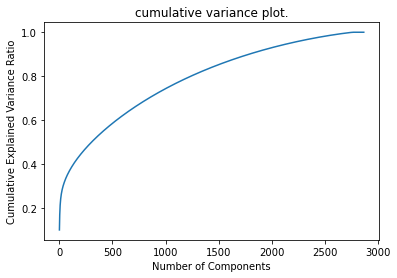

In [10]:
from sklearn.decomposition import PCA
# Create a PCA object
pca = PCA()

# Fit the PCA model to the HOG features
pca.fit(x)

# Calculate the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_)

# Plot the explained variance ratio against number of components
plt.plot(cumulative_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('cumulative variance plot.')
plt.show()

PCA Transformation:

pca.transform(x): This line applies the PCA transformation to the HOG feature matrix x. PCA is a dimensionality reduction technique that identifies the axes (principal components) along which the variance in the data is maximized. By projecting the data onto these axes, it's possible to reduce the number of dimensions (features) while retaining most of the variance (information) in the data. The result, B, is the transformed dataset where each row represents an image and columns represent the principal components. The number of columns in B is equal to the number of components in the PCA model, which was fit to the data earlier.
Converting to DataFrame:

B = pd.DataFrame(B): This line converts the transformed feature matrix B into a pandas DataFrame. This is often done for ease of data manipulation and to utilize pandas' functionality for data analysis, as DataFrames are a more flexible and intuitive structure for tabular data.
Fitting PCA with a Specified Number of Components:

pca = PCA(n_components=100): Here, a new PCA object is created with a specified number of components (n_components=100). This means that when this PCA model is fit and applied to the data, it will reduce the dimensionality of the data to 100 principal components, regardless of the original number of features.
pca.fit(x): This line fits the new PCA model to the HOG features (x). The PCA model learns the 100 principal components that capture the most variance in the data. This fitting process involves computing the eigenvectors (principal components) and eigenvalues (explained variance) of the data's covariance matrix.
The purpose of these operations is to reduce the dimensionality of the feature set to make subsequent machine learning models more efficient and potentially more effective. By reducing the number of features to a set of principal components that capture the majority of the variance in the data, it's possible to speed up training times, reduce the risk of overfitting, and possibly improve the generalization performance of the models. The choice of 100 components is a balance between retaining enough information (variance) and reducing the feature space to a manageable size.

In [11]:

B = pca.transform(x)
B = pd.DataFrame(B)
B 

,0,1,2,3,4,5,6,7,8,9,...,2860,2861,2862,2863,2864,2865,2866,2867,2868,2869
0,15.627938,-1.735195,2.216702,-0.390751,0.591251,-4.945496,3.877707,0.938133,2.946141,-0.285276,...,9.020562e-17,-7.632783e-17,1.509209e-16,-4.952636e-16,2.602085e-16,-6.713380e-16,-7.784572e-17,-1.096345e-15,4.770490e-16,-2.445960e-16
1,13.813557,-2.873029,1.346396,2.829213,-3.363437,-0.544171,-3.441135,-1.955498,0.034826,-0.861259,...,1.401657e-15,-3.307250e-15,-3.282964e-15,-2.361826e-15,-3.608225e-16,1.734723e-17,-8.220421e-16,-2.754741e-15,1.032160e-15,2.256875e-15
2,-5.965256,3.306897,5.130068,7.413554,2.121487,-2.256332,-0.150310,-1.332672,-1.504574,0.238726,...,2.500604e-15,3.755676e-16,2.956728e-15,1.453698e-15,-2.749537e-15,9.948639e-16,-5.752777e-16,-1.428545e-15,4.753142e-16,4.595865e-16
3,-8.589394,3.723193,4.405952,0.521718,3.436637,-2.386648,-1.302875,-1.150471,-3.603522,0.947297,...,2.027892e-15,6.331741e-16,-1.073794e-15,1.859624e-15,-6.678685e-16,3.264099e-15,-4.109126e-16,7.251144e-16,1.354819e-15,1.016548e-15
4,-8.677028,2.859252,4.761868,-2.080242,3.014057,-2.268946,-1.591664,-1.386946,-4.032524,1.296201,...,-7.303186e-16,1.987993e-15,-1.075529e-16,2.571077e-15,-3.894454e-15,2.060851e-15,-1.613293e-16,1.092876e-15,-1.547373e-15,1.708703e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,-12.260603,-1.385491,-3.213993,0.749819,-2.992446,0.995263,5.257908,1.465123,-1.821633,4.843168,...,-4.727121e-16,4.302114e-16,1.726050e-16,7.077672e-16,2.359224e-16,1.535230e-16,3.300311e-16,-1.561251e-16,-7.806256e-18,-6.318730e-16
2866,-11.814813,-1.647151,-2.797724,0.836545,-3.312577,1.711157,5.308228,1.037922,-2.006318,4.521808,...,-7.546047e-16,-4.104789e-16,3.096481e-16,-4.024558e-16,4.475587e-16,2.914335e-16,-2.151057e-16,1.403391e-15,-1.890849e-16,-2.775558e-17
2867,-11.911042,-2.117625,-2.939042,0.571009,-2.992766,1.243995,4.818402,0.993460,-1.154225,3.645952,...,-8.743006e-16,-6.071532e-18,-4.302114e-16,-2.810252e-16,-2.428613e-17,3.330669e-16,4.336809e-17,-1.561251e-17,-1.495332e-15,4.787837e-16
2868,-5.708559,3.051829,-6.307533,1.517266,-0.740264,-4.589578,-0.884442,8.252009,-1.167658,-1.616995,...,1.643650e-15,5.813492e-16,8.153200e-17,-1.394284e-15,-4.631712e-16,-9.402201e-16,-1.110223e-15,-3.452100e-16,-1.576430e-16,-3.226586e-16


In [12]:
pca = PCA(n_components=100)
pca.fit(x)

PCA(n_components=100)

Saving the PCA Model
The PCA model that was previously fit to the HOG features is serialized (saved) to disk using Python's pickle module, allowing it to be loaded and used later without retraining. The file is named 'PCA_model.sav'.
Transforming Features Using PCA and Preparing Final Data

In [13]:
# save the model to disk
import joblib
filename = 'PCA_model.sav'
pickle.dump(pca, open(filename, 'wb'))

Transforming Features Using PCA and Preparing Final Data
The HOG features in x are transformed using the previously trained PCA model to reduce dimensionality. This transformed feature set is converted into a pandas DataFrame, B.

In [14]:

B = pca.transform(x)
B = pd.DataFrame(B)
B

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,15.627938,-1.735195,2.216702,-0.390751,0.591251,-4.945496,3.877707,0.938133,2.946141,-0.285276,...,0.242042,0.573684,-0.134168,-0.265885,0.893967,-0.195656,-0.615855,0.457960,0.022795,-0.170974
1,13.813557,-2.873029,1.346396,2.829213,-3.363437,-0.544171,-3.441135,-1.955498,0.034826,-0.861259,...,0.660068,-0.436143,0.394582,0.789019,-0.137394,-0.687626,-0.479953,-0.488944,0.473024,-0.143774
2,-5.965256,3.306897,5.130068,7.413554,2.121487,-2.256332,-0.150310,-1.332672,-1.504574,0.238726,...,0.744465,-0.954531,0.527825,0.687570,0.568427,0.853321,0.434545,1.018838,-0.431596,-0.759334
3,-8.589394,3.723193,4.405952,0.521718,3.436637,-2.386648,-1.302875,-1.150471,-3.603522,0.947297,...,0.950739,-1.335615,-0.270340,-1.189087,-0.286419,-0.105454,-0.001851,-0.673364,-0.941132,0.303493
4,-8.677028,2.859252,4.761868,-2.080242,3.014057,-2.268946,-1.591664,-1.386946,-4.032524,1.296202,...,0.316339,-1.014438,-0.960739,-0.192288,1.067034,0.201071,-0.317559,-0.022925,-1.532952,1.295024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,-12.260603,-1.385491,-3.213993,0.749819,-2.992446,0.995263,5.257908,1.465123,-1.821633,4.843167,...,1.247802,0.647645,-0.632903,1.122068,-0.490490,0.256737,0.395372,0.684092,0.508325,0.362434
2866,-11.814813,-1.647151,-2.797724,0.836545,-3.312577,1.711157,5.308228,1.037922,-2.006318,4.521808,...,1.720422,0.687735,-0.602742,0.804681,0.512112,0.027892,0.008526,0.339904,0.729118,0.022834
2867,-11.911042,-2.117625,-2.939042,0.571009,-2.992766,1.243995,4.818402,0.993460,-1.154225,3.645951,...,2.035223,0.553487,-0.846134,0.681446,0.087757,0.605949,0.705301,-0.167388,1.356298,0.030337
2868,-5.708559,3.051829,-6.307533,1.517266,-0.740264,-4.589578,-0.884442,8.252009,-1.167658,-1.616995,...,0.138892,0.142677,0.607325,-0.457033,-0.667145,-0.471767,0.731323,-1.361992,0.088085,-0.943841


The class labels stored in y are concatenated to B as the final column, ensuring each row in B now consists of the principal components followed by the corresponding class label. This forms the complete dataset for training machine learning models.

In [15]:
#Concatinate the Class ID's 
B=pd.concat([B, pd.DataFrame(y)],axis=1)
B

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,0
0,15.627938,-1.735195,2.216702,-0.390751,0.591251,-4.945496,3.877707,0.938133,2.946141,-0.285276,...,0.573684,-0.134168,-0.265885,0.893967,-0.195656,-0.615855,0.457960,0.022795,-0.170974,0
1,13.813557,-2.873029,1.346396,2.829213,-3.363437,-0.544171,-3.441135,-1.955498,0.034826,-0.861259,...,-0.436143,0.394582,0.789019,-0.137394,-0.687626,-0.479953,-0.488944,0.473024,-0.143774,0
2,-5.965256,3.306897,5.130068,7.413554,2.121487,-2.256332,-0.150310,-1.332672,-1.504574,0.238726,...,-0.954531,0.527825,0.687570,0.568427,0.853321,0.434545,1.018838,-0.431596,-0.759334,0
3,-8.589394,3.723193,4.405952,0.521718,3.436637,-2.386648,-1.302875,-1.150471,-3.603522,0.947297,...,-1.335615,-0.270340,-1.189087,-0.286419,-0.105454,-0.001851,-0.673364,-0.941132,0.303493,0
4,-8.677028,2.859252,4.761868,-2.080242,3.014057,-2.268946,-1.591664,-1.386946,-4.032524,1.296202,...,-1.014438,-0.960739,-0.192288,1.067034,0.201071,-0.317559,-0.022925,-1.532952,1.295024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,-12.260603,-1.385491,-3.213993,0.749819,-2.992446,0.995263,5.257908,1.465123,-1.821633,4.843167,...,0.647645,-0.632903,1.122068,-0.490490,0.256737,0.395372,0.684092,0.508325,0.362434,3
2866,-11.814813,-1.647151,-2.797724,0.836545,-3.312577,1.711157,5.308228,1.037922,-2.006318,4.521808,...,0.687735,-0.602742,0.804681,0.512112,0.027892,0.008526,0.339904,0.729118,0.022834,3
2867,-11.911042,-2.117625,-2.939042,0.571009,-2.992766,1.243995,4.818402,0.993460,-1.154225,3.645951,...,0.553487,-0.846134,0.681446,0.087757,0.605949,0.705301,-0.167388,1.356298,0.030337,3
2868,-5.708559,3.051829,-6.307533,1.517266,-0.740264,-4.589578,-0.884442,8.252009,-1.167658,-1.616995,...,0.142677,0.607325,-0.457033,-0.667145,-0.471767,0.731323,-1.361992,0.088085,-0.943841,3


This final dataset is then saved to a CSV file named 'Final_HOG_Feature.csv' without headers or indexes, making it suitable for loading as raw data.

In [16]:
#Creating Final Feature File after applying PCA 
csv_data1=B.to_csv('Final_HOG_Feature.csv', mode='w',header=False,index=False)

Loading and Preprocessing the Final Dataset
The saved CSV file is loaded into a pandas DataFrame, train_data, with no header as the CSV doesn't contain column names.

The script checks for any missing values (NaN) in the data. Handling missing values is crucial to prevent errors during model training.

In [17]:
train_data = pd.read_csv('Final_HOG_Feature.csv',header=None)
     

#Check for NaN under a single DataFrame column
train_data.isnull().values.any()

False

The features (principal components) and labels are separated into X and Y, respectively. X contains all columns except the last one, which is assumed to be the class label column. Y is the last column, containing the class labels.

In [18]:
X = train_data.drop(columns= 100, axis=1)

In [19]:
X

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,15.627938,-1.735195,2.216702,-0.390751,0.591251,-4.945496,3.877707,0.938133,2.946141,-0.285276,...,0.242042,0.573684,-0.134168,-0.265885,0.893967,-0.195656,-0.615855,0.457960,0.022795,-0.170974
1,13.813557,-2.873029,1.346396,2.829213,-3.363437,-0.544171,-3.441135,-1.955498,0.034826,-0.861259,...,0.660068,-0.436143,0.394582,0.789019,-0.137394,-0.687626,-0.479953,-0.488944,0.473024,-0.143774
2,-5.965256,3.306897,5.130068,7.413554,2.121487,-2.256332,-0.150310,-1.332672,-1.504574,0.238726,...,0.744465,-0.954531,0.527825,0.687570,0.568427,0.853321,0.434545,1.018838,-0.431596,-0.759334
3,-8.589394,3.723193,4.405952,0.521718,3.436637,-2.386648,-1.302875,-1.150471,-3.603522,0.947297,...,0.950739,-1.335615,-0.270340,-1.189087,-0.286419,-0.105454,-0.001851,-0.673364,-0.941132,0.303493
4,-8.677028,2.859252,4.761868,-2.080242,3.014057,-2.268946,-1.591664,-1.386946,-4.032524,1.296202,...,0.316339,-1.014438,-0.960739,-0.192288,1.067034,0.201071,-0.317559,-0.022925,-1.532952,1.295024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,-12.260603,-1.385491,-3.213993,0.749819,-2.992446,0.995263,5.257908,1.465123,-1.821633,4.843167,...,1.247802,0.647645,-0.632903,1.122068,-0.490490,0.256737,0.395372,0.684092,0.508325,0.362434
2866,-11.814813,-1.647151,-2.797724,0.836545,-3.312577,1.711157,5.308228,1.037922,-2.006318,4.521808,...,1.720422,0.687735,-0.602742,0.804681,0.512112,0.027892,0.008526,0.339904,0.729118,0.022834
2867,-11.911042,-2.117625,-2.939042,0.571009,-2.992766,1.243995,4.818402,0.993460,-1.154225,3.645951,...,2.035223,0.553487,-0.846134,0.681446,0.087757,0.605949,0.705301,-0.167388,1.356298,0.030337
2868,-5.708559,3.051829,-6.307533,1.517266,-0.740264,-4.589578,-0.884442,8.252009,-1.167658,-1.616995,...,0.138892,0.142677,0.607325,-0.457033,-0.667145,-0.471767,0.731323,-1.361992,0.088085,-0.943841


In [20]:

Y  = train_data[100]

In [21]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
2865    3
2866    3
2867    3
2868    3
2869    3
Name: 100, Length: 2870, dtype: int64

In [22]:
 ##Applying Classifiers With K Fold Cross Validation

#### Applying Models

Logistic Regression

In [52]:
#Logistic Regression

k = 5
kf = KFold(n_splits=k, random_state=None)
model_LR = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = Y[train_index] , Y[test_index]
     
    model_LR.fit(X_train,y_train)
    pred_values = model_LR.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score_lr = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score_lr))
joblib.dump(model_LR, "LG_HOG.sav")

accuracy of each fold - [0.6794425087108014, 0.6463414634146342, 0.37456445993031356, 0.5975609756097561, 0.5993031358885017]
Avg accuracy : 0.5794425087108014


['LG_HOG.sav']

Random Forest

In [53]:
#Random Forest

k = 5
kf = KFold(n_splits=k, random_state=None)
model_RF = RandomForestClassifier()
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = Y[train_index] , Y[test_index]
     
    model_RF.fit(X_train,y_train)
    pred_values = model_RF.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score_rf = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score_rf))

accuracy of each fold - [0.47038327526132406, 0.6655052264808362, 0.30139372822299654, 0.4442508710801394, 0.3048780487804878]
Avg accuracy : 0.43728222996515675


KNN Classifier

In [54]:
k = 5
kf = KFold(n_splits=k, random_state=None)
model_knn = KNeighborsClassifier()

acc_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :].to_numpy(), X.iloc[test_index, :].to_numpy()  # Convert to NumPy array
    y_train, y_test = Y[train_index], Y[test_index]
    
    model_knn.fit(X_train, y_train)
    pred_values = model_knn.predict(X_test)
    
    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)

avg_acc_score_kn = sum(acc_score) / k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score_kn))


accuracy of each fold - [0.6393728222996515, 0.6498257839721254, 0.3118466898954704, 0.5156794425087108, 0.6167247386759582]
Avg accuracy : 0.5466898954703833


In [26]:
!pip install xgboost

XGBoost

In [27]:
import xgboost as xgb

In [55]:
 #XGBoost

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=None)

model_xgb = xgb.XGBClassifier()

acc_score = []
y_pred_list = []
y_test_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = Y[train_index], Y[test_index]

    model_xgb.fit(X_train, y_train)

    y_pred = model_xgb.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_score.append(acc)

    y_pred_list.extend(y_pred)
    y_test_list.extend(y_test)

avg_acc_score_xg = sum(acc_score) / k

print('Accuracy of each fold - {}'.format(acc_score))
print('Average accuracy: {}'.format(avg_acc_score_xg))

joblib.dump(model_xgb, "xgb.sav")

Accuracy of each fold - [0.9006968641114983, 0.9233449477351916, 0.8797909407665505, 0.8780487804878049, 0.8954703832752613]
Average accuracy: 0.8954703832752614


['xgb.sav']

AdaBoost

In [29]:
#AdaBoost

k = 5
kf = KFold(n_splits=k, random_state=None)
model_AB = AdaBoostClassifier()
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = Y[train_index] , Y[test_index]
     
    model_AB.fit(X_train,y_train)
    pred_values = model_AB.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score_ab = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score_ab))

accuracy of each fold - [0.2787456445993031, 0.45818815331010454, 0.3170731707317073, 0.25435540069686413, 0.39198606271777003]
Avg accuracy : 0.3400696864111498


SVM

In [56]:
#SVM

k = 5
kf = KFold(n_splits=k, random_state=None)
model_SVM = SVC(kernel='linear')

acc_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = Y[train_index], Y[test_index]

    model_SVM.fit(X_train, y_train)
    pred_values = model_SVM.predict(X_test)

    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)

avg_acc_score_svm = sum(acc_score) / k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score_svm))

accuracy of each fold - [0.686411149825784, 0.6898954703832753, 0.3606271777003484, 0.6306620209059234, 0.6149825783972126]
Avg accuracy : 0.5965156794425088


Decision Tree

In [57]:
#Decision Tree

k = 5
kf = KFold(n_splits=k, random_state=None)
model_DT = DecisionTreeClassifier()

acc_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = Y[train_index], Y[test_index]

    model_DT.fit(X_train, y_train)
    pred_values = model_DT.predict(X_test)

    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)

avg_acc_score_dt = sum(acc_score) / k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score_dt))

accuracy of each fold - [0.43205574912891986, 0.6097560975609756, 0.34668989547038326, 0.4965156794425087, 0.3205574912891986]
Avg accuracy : 0.4411149825783972


Gradient Boosting

In [58]:
#Gradient Boosting

k = 5
kf = KFold(n_splits=k, random_state=None)
model_GBM = GradientBoostingClassifier()

acc_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = Y[train_index], Y[test_index]

    model_GBM.fit(X_train, y_train)
    pred_values = model_GBM.predict(X_test)

    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)

avg_acc_score_gb = sum(acc_score) / k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score_gb))

accuracy of each fold - [0.4808362369337979, 0.681184668989547, 0.3310104529616725, 0.5592334494773519, 0.4808362369337979]
Avg accuracy : 0.5066202090592334


Pituitary Tumor


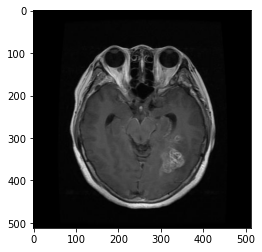

descriptor shape  3  :  (15000,)
[1]
Given Image is of Meningioma Tumor
Glioma Tumor


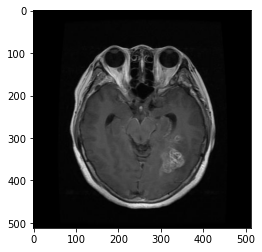

descriptor shape  3  :  (15000,)
[0]
Given Image is of Glioma Tumor


In [50]:
##Results
print("Pituitary Tumor")
#Reading Image
img = cv2.imread("pituitary.jpg")
plt.imshow(img2)
plt.show()

#resize total  image size to 200 x 200
resize=(200,200)
img1=cv2.resize(img,resize)

#Grayscaling the Image
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Apply median filter with kernel size 3x3
median_img = cv2.medianBlur(gray, 3)

#Applying HOG Feature Descriptor
fd, hog_image = hog(median_img, orientations=6, pixels_per_cell=(4, 4),  transform_sqrt=True,cells_per_block=(1, 1), visualize=True)

# Convert the descriptor array into a DataFrame format
print("descriptor shape ", i, " : ", fd.shape)

#Getting data in a Dataframe
df = pd.DataFrame(fd)

#Appling Transpose to dataframe to convert rows into column and column into rows
df_transposed = df.transpose()
df_transposed

#Loading the PCA Model
pca = joblib.load('PCA_model.sav')

#Applying the PCA to extracted Data
fd_pca = pca.transform(df_transposed)
     

# Load the XGBoost model as it provides highest Accuracy
loaded_model = joblib.load("xgb.sav")

# Use the loaded model for prediction
y_pred = loaded_model.predict(fd_pca)

print(y_pred)
# Glioma = 0 
# Meningioma = 1
# No tumor = 2
# Pituitary = 3

if y_pred == 0:
    print("Given Image is of Glioma Tumor")
elif y_pred == 1:
    print("Given Image is of Meningioma Tumor")
elif y_pred == 2:
    print("Given Image is of No Tumor")
else:
    print("Given Image is of Pituitary Tumor")
    
print("Glioma Tumor")
img2 = cv2.imread("glioma.jpg")
plt.imshow(img2)
plt.show()

#resize total  image size to 200 x 200
resize=(200,200)
img3=cv2.resize(img2,resize)

#Grayscaling the Image
gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

# Apply median filter with kernel size 3x3
median_img = cv2.medianBlur(gray, 3)

#Applying HOG Feature Descriptor
fd, hog_image = hog(median_img, orientations=6, pixels_per_cell=(4, 4),  transform_sqrt=True,cells_per_block=(1, 1), visualize=True)

# Convert the descriptor array into a DataFrame format
print("descriptor shape ", i, " : ", fd.shape)

#Getting data in a Dataframe
df = pd.DataFrame(fd)

#Appling Transpose to dataframe to convert rows into column and column into rows
df_transposed = df.transpose()
df_transposed

#Loading the PCA Model
pca = joblib.load('PCA_model.sav')

#Applying the PCA to extracted Data
fd_pca = pca.transform(df_transposed)
     

# Load the XGBoost model as it provides highest Accuracy
loaded_model = joblib.load("xgb.sav")

# Use the loaded model for prediction
y_pred = loaded_model.predict(fd_pca)

print(y_pred)
# Glioma = 0 
# Meningioma = 1
# No tumor = 2
# Pituitary = 3

if y_pred == 0:
    print("Given Image is of Glioma Tumor")
elif y_pred == 1:
    print("Given Image is of Meningioma Tumor")
elif y_pred == 2:
    print("Given Image is of No Tumor")
else:
    print("Given Image is of Pituitary Tumor")
     

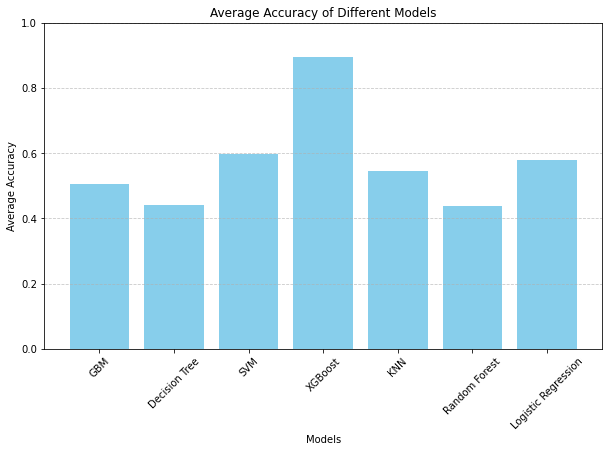

In [65]:
import matplotlib.pyplot as plt

# Modellerin ve doğruluk değerlerinin tanımlanması
models = ['GBM', 'Decision Tree', 'SVM', 'XGBoost', 'KNN', 'Random Forest', 'Logistic Regression']
accuracies = [avg_acc_score_gb, avg_acc_score_dt, avg_acc_score_svm,  avg_acc_score_xg, avg_acc_score_kn, avg_acc_score_rf, avg_acc_score_lr]

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy of Different Models')
plt.ylim(0, 1)  # Y eksenini 0 ile 1 arasında sınırla
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # X eksenindeki yazıları 45 derece döndür
plt.show()
